# Анализ источников траффика, выявление перспективных источников траффика и категорий клиентов сайта за период июнь 2017 - май 2018 гг.

# *Краткое описание*

**Цели и задачи проекта**
1. Подготовим и изучим данные о посещениях сайта, о заказах и рекламных расходах.
2. Рассчитаем метрики: продуктовые, маркетинговые и метрики электронной коммерции.
3. Сформулируем выводы и предоставим рекомендации маркетологам. 

Для выполнения поставленной задачи предстоит работать с данными, содержащимися в трех датасетах формата csv.

**План работы**
1. Откроем файлы с данными и изучим общую информацию о данных.
2. Изучим и подготовим данные.
3. Рассчитаем метрики.
4. Подготовим выводы и рекомендации по итогам исследования.

**Оглавление**
1. [Загрузка файлов с данными и ознакомление с ними](#start)
2. [Предобработка данных](#preprocessing)
3. [Расчет метрик](#metrics)  
3.1. [Продуктовые метрики](#productmetrics)  
3.2. [Метрики электронной коммерции](#ecommercemetrics)  
3.3. [Маркетинговые метрики](#marketingmetrics)
4. [Общие выводы и рекомендации](#summary)

<a id="start"></a>
## Загрузка файлов с данными и ознакомление с ними 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#сохраним данные в переменные
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

#создадим функцию для ознакомления с данными
def data_info(data):
    print('Визуальное ознакомление с датасетом')
    display(data.sample(n=5, random_state=5))
    print()
    print('Получение информации о датасете')
    display(data.describe())
    print()
    display(data.info())
    print()
    print('Доля пропущенных значений')
    display(data.isna().mean()*100) 

In [3]:
#ознакомимся с датасетом visits
data_info(visits)

Визуальное ознакомление с датасетом


,Device,End Ts,Source Id,Start Ts,Uid
151723,touch,2017-06-23 22:37:00,1,2017-06-23 22:15:00,10475847712894689184
317451,desktop,2018-03-02 19:27:00,5,2018-03-02 19:21:00,10549917297394170153
268805,desktop,2018-01-05 22:18:00,5,2018-01-05 21:59:00,8353921942887518567
300849,desktop,2017-10-28 17:40:00,4,2017-10-28 17:22:00,15164620736258215824
201766,desktop,2018-01-04 08:50:00,3,2018-01-04 08:49:00,14779799771786542313



Получение информации о датасете


,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


None


Доля пропущенных значений


Device       0.0
End Ts       0.0
Source Id    0.0
Start Ts     0.0
Uid          0.0
dtype: float64

In [4]:
#ознакомимся с датасетом orders
data_info(orders)

Визуальное ознакомление с датасетом


,Buy Ts,Revenue,Uid
27263,2017-12-30 20:00:00,1.22,1177976555412643912
1951,2017-06-25 10:35:00,1.39,3789923567680120489
30071,2018-01-19 14:27:00,0.24,14410987352017648973
6219,2017-08-28 16:50:00,6.11,13888745432979765063
9871,2017-09-30 18:57:00,6.42,15364148623145853745



Получение информации о датасете


,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


None


Доля пропущенных значений


Buy Ts     0.0
Revenue    0.0
Uid        0.0
dtype: float64

In [5]:
#ознакомимся с датасетом costs
data_info(costs)

Визуальное ознакомление с датасетом


,source_id,dt,costs
295,1,2018-03-23,59.97
86,1,2017-08-26,30.38
466,2,2017-09-12,81.64
226,1,2018-01-13,36.75
346,1,2018-05-15,47.00



Получение информации о датасете


,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


None


Доля пропущенных значений


source_id    0.0
dt           0.0
costs        0.0
dtype: float64

# Выводы к шагу 1

1. Используем в работе три датасета: visits (визиты), orders (заказы), costs (расходы).
2. Датасет visits состоит из 359400 строк и 5 столбцов. Их данные представлены в форматах: object, int64 и uint64. Обратим внимание на то, что в столбцах с датами и временем тип данных object. В следующем шаге приведем его к типу datetime. Названия столбцов также на следующем этапе приведем к нижнему регистру. Пропуски в данном датасете отсутствуют.
3. Датасет orders состоит из 50415 строк и 3 столбцов. Их данные представлены в форматах: float64, object и uint64. Обратим внимание на то, что в столбце с датой и временем тип данных object. В следующем шаге приведем его к типу datetime. Названия столбцов также на следующем этапе приведем к нижнему регистру. Пропуски в данном датасете отсутствуют.
4. Датасет costs состоит из 2542 строк и 3 столбцов. Их данные представлены в форматах: float64, object и int64. Обратим внимание на то, что в столбце с датой и временем тип данных object. В следующем шаге приведем его к типу datetime. Названия столбцов также на следующем этапе приведем в соответствие их содержанию (для лучшего понимания). Пропуски в данном датасете отсутствуют.
5. В следущем шаге ознакомимся подробнее с содержанием каждого из датасетов в целях отработки дубликатов и замены типов данных.

<a id="preprocessing"></a>
## Предобработка данных

In [6]:
#приведем столбцы visits к нижнему регистру и изменим названия
visits.set_axis(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], axis='columns', inplace=True)

#проверяем
visits.head(1)

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062


In [7]:
#меняем тип данных в столбце end_ts
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format='%Y-%m-%d %H:%M:%S')

#меняем тип данных в столбце source_id
visits['source_id'] = visits['source_id'].astype('uint8')

#меняем тип данных в столбце start_ts
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format='%Y-%m-%d %H:%M:%S')

#проверяем
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null uint8
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), object(1), uint64(1), uint8(1)
memory usage: 11.3+ MB


In [8]:
#проверим датасет на дубликаты
visits.duplicated().sum()

0

In [9]:
#приведем столбцы orders к нижнему регистру и изменим названия
orders.set_axis(['buy_ts', 'revenue', 'uid'], axis='columns', inplace=True)

#проверяем
orders.head(1)

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.0,10329302124590727494


In [10]:
#меняем тип данных в столбце buy_ts
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format='%Y-%m-%d %H:%M:%S')

#проверяем
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [11]:
#проверим датасет на дубликаты
orders.duplicated().sum()

0

In [12]:
#переименуем столбец dt
costs.rename(columns={'dt': 'date'}, inplace=True)

#поменяем тип данных в столбце date
costs['date'] = pd.to_datetime(costs['date'], format='%Y-%m-%d')

#проверяем
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
date         2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [13]:
#проверим датасет на дубликаты
costs.duplicated().sum()

0

# Вывод к шагу 2

1. Во всех трех датасетах столбцы с датами привели к типу datetime, а все их названия привели к нижнему регистру и переименовали (там, где это требовалось).
2. Данные столбца source_id таблицы visits привели к типу uint8.
3. Проверили таблицу на дубликаты и выявили, что они отсутствуют.

<a id="metrics"></a>
## Расчет метрик

<a id="productmetrics"></a>
### Продуктовые метрики

#### DAU, WAU, MAU

In [14]:
#создадим столбцы в visits с годом, месяцем, неделей и полной датой
visits['session_month'] = visits['start_ts'].astype('datetime64[M]')
visits['session_week'] = visits['start_ts'].astype('datetime64[W]')
visits['session_date'] = visits['start_ts'].dt.date

#проверяем
visits.head(1)

,device,end_ts,source_id,start_ts,uid,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,2017-12-14,2017-12-20


In [15]:
#рассчитаем метрики DAU, WAU, MAU

dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby('session_week').agg({'uid': 'nunique'}).mean()
mau_total = visits.groupby('session_month').agg({'uid': 'nunique'}).mean()

#проверяем
print('DAU', int(dau_total))
print('WAU', int(wau_total))
print('MAU', int(mau_total))

DAU 907
WAU 5724
MAU 23228


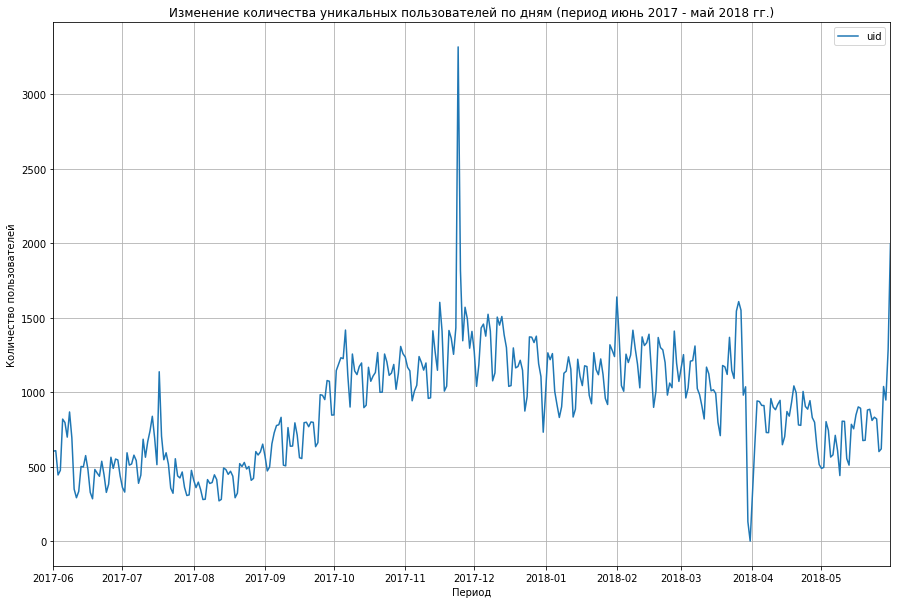

In [16]:
#Строим график изменения количества уникальных пользователей в день
visits.groupby('session_date').agg({'uid': 'nunique'}).plot(figsize=(15, 10), grid=True)
plt.title('Изменение количества уникальных пользователей по дням (период июнь 2017 - май 2018 гг.)')
plt.ylabel('Количество пользователей')
plt.xlabel('Период')
plt.show()

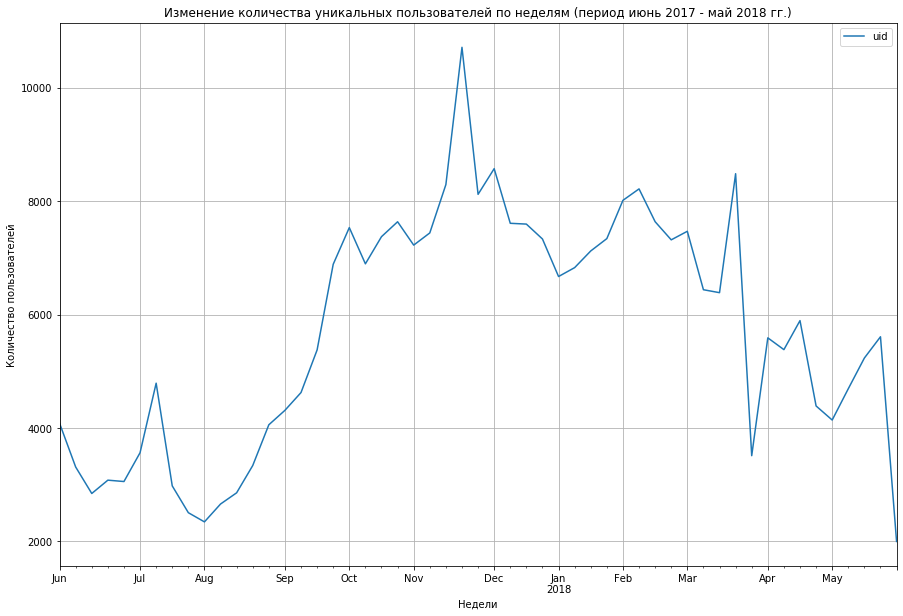

In [17]:
#Строим график изменения количества уникальных пользователей в неделю
visits.groupby('session_week').agg({'uid': 'nunique'}).plot(figsize=(15, 10), grid=True)
plt.title('Изменение количества уникальных пользователей по неделям (период июнь 2017 - май 2018 гг.)')
plt.ylabel('Количество пользователей')
plt.xlabel('Недели')
plt.show()

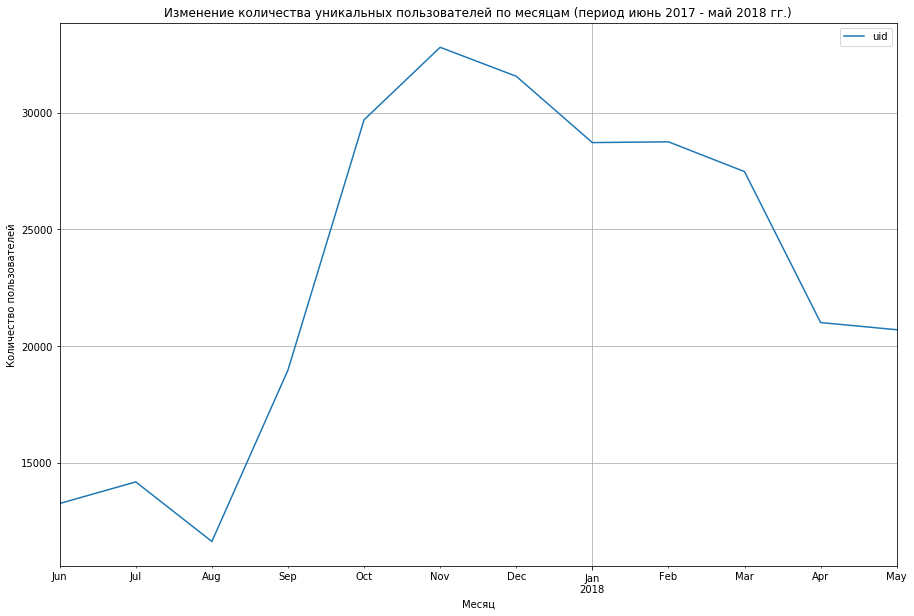

In [18]:
#Строим график изменения количества уникальных пользователей в месяц
visits.groupby('session_month').agg({'uid': 'nunique'}).plot(figsize=(15, 10), grid=True)
plt.title('Изменение количества уникальных пользователей по месяцам (период июнь 2017 - май 2018 гг.)')
plt.ylabel('Количество пользователей')
plt.xlabel('Месяц')
plt.show()

**Выводы**
1. Из расчетов получили такие результаты: количество уникальных пользователей в день - 907, в неделю - WAU 5724, в месяц - MAU 23228.
2. Из первого графика видим, что пик количества пользователей по дням приходится на 15-21 день ноября. При этом замечаем, что пользовательская активность практически падает до нуля в конце марта 18 года и резко возрастает (примерно до 900 пользователей) в начале апреля этого же года.
3. Что касается распределения по неделям и месяцам, то больше всего пользователей приходится на ноябрь 17 года. Плюс, наблюдается резкий рост пользователей начиная с августа 17 года вплоть до декабря. После новогодних каникул наблюдается постепенное снижение количества пользователей. При этом, в теплое время года: с апреля по начало сентября пользователей становится меньше всего. Такая "сезонность" может быть обусловлена поездками на дачу, проведением времени на улице, отпусками.  

#### Количество посещений день в среднем. 

In [19]:
visits_per_day = visits.groupby('session_date').agg({'uid': 'count'}).mean()
print('Количество посещений в день в среднем:', int(visits_per_day))

Количество посещений в день в среднем: 987


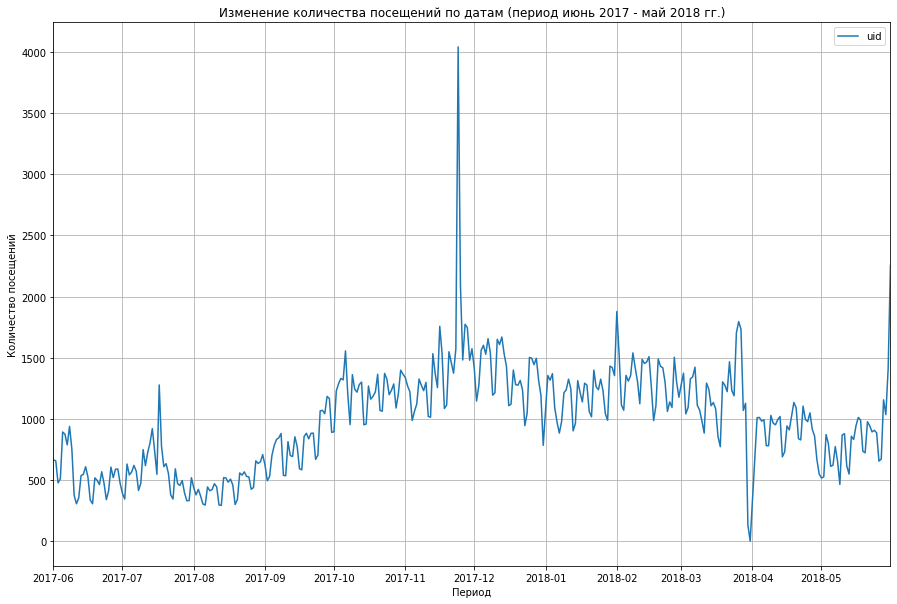

In [20]:
#строим график изменения количества посещений в день
visits.groupby('session_date').agg({'uid': 'count'}).plot(figsize=(15, 10), grid=True)
plt.title('Изменение количества посещений по датам (период июнь 2017 - май 2018 гг.)')
plt.ylabel('Количество посещений')
plt.xlabel('Период')
plt.show()

In [21]:
#считаем разницу между посещениями и уникальными пользователями в день
print(int(visits_per_day - dau_total))

79


**Вывод**
1. Разница между средним количеством посещений в день и количеством уникальных пользователей в день составила 79, чуть больше 10%. Т.е. немного пользователей, которые повторно возвращаются на сайт.
2. Судя по графику изменения количества посещений в день аналогичны изменениям количества уникальных пользователей. Из графика видим, что пик количества посещений по дням приходится на 15-21 день ноября. При этом замечаем, что пользовательская активность практически падает до нуля в конце марта 18 года и резко возрастает (примерно до 1000 пользователей) в начале апреля этого же года. 

#### Количество сессий пользователей и времени на сайте

In [22]:
#посчитаем среднее количество сессий за исследуемый период 
session_per_user = visits.groupby('session_month').agg({'uid': ['count', 'nunique']})
session_per_user.columns = ['n_sessions', 'n_users']
session_per_user['sessions_per_user'] = session_per_user['n_sessions'] / session_per_user['n_users']

print(session_per_user['sessions_per_user'].mean())
                                                               

1.2808894945992668


In [23]:
#посмотрим продолжительность средней сессии за весь период
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits['session_duration_sec'].mean()


643.506488592098

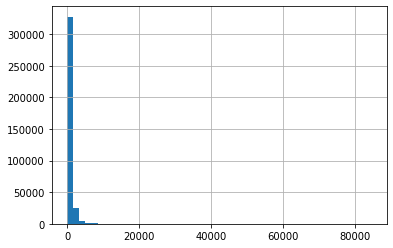

In [24]:
#смотрим на распределение
visits['session_duration_sec'].hist(bins=50)

Распределение не является нормальным или близким к нему, поэтому среднее не подходит. Нужно рассчитать моду.

In [25]:
#узнаем моду
visits['session_duration_sec'].mode()

0    60
dtype: int64

**Выводы**
1. Узнали, что среднее количество сессий за весь период составило 1,28. Т.е. немногим больше чем одна сессия на одного пользователя, а значит пользователи используют сайт нерегулярно.
2. Посчитали среднюю продолжительность сессии, которая составила 643 сек. Построив график распределения, убедились, что лучше использовать моду (60 сек.), т.к. график распределения не являлся нормальным или близким к нормальному.
3. Такое короткое время в 60 сек. может быть достаточным для того, чтобы проверить расписание сеансов, например. Но если пользователь еще не решил чем себя занять, куда сходить и т.д., то этого времени явно будет мало.  

#### Retention Rate

In [26]:
#узнаем дату первого посещения и изменим наименование столбцов
first_visit_date = visits.groupby('uid')['start_ts'].min().reset_index()
first_visit_date.columns = ['uid', 'first_visit_start']

#проверяем
first_visit_date.head(1)

,uid,first_visit_start
0,11863502262781,2018-03-01 17:27:00


In [27]:
#добавляем столбцы дня первого визита и месяца первого визита
first_visit_date['first_visit_dt'] = first_visit_date['first_visit_start'].dt.date
first_visit_date['first_visit_month'] = first_visit_date['first_visit_start'].astype('datetime64[M]')
                                                                                     
#проверяем 
first_visit_date.head(1)

,uid,first_visit_start,first_visit_dt,first_visit_month
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01


In [28]:
#объединяем датафрейм visits и датасета с первым посещением
visits_new = pd.merge(first_visit_date, visits, on='uid')

#проверяем
visits_new.head(1)

,uid,first_visit_start,first_visit_dt,first_visit_month,device,end_ts,source_id,start_ts,session_month,session_week,session_date,session_duration_sec
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,2018-03-01,2018-03-01,2018-03-01,360


In [29]:
#создадим столбец lifetime с целыми значениями
visits_new['cohort_lifetime'] = ((visits_new['session_month'] - visits_new['first_visit_month']) / np.timedelta64(1, 'M')).round().astype('int')

#проверяем
visits_new.head(1)

,uid,first_visit_start,first_visit_dt,first_visit_month,device,end_ts,source_id,start_ts,session_month,session_week,session_date,session_duration_sec,cohort_lifetime
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,2018-03-01,2018-03-01,2018-03-01,360,0


In [30]:
visits_cohorts = visits_new.groupby(['first_visit_month', 'cohort_lifetime']).agg({'uid': 'nunique'}).reset_index()
visits_cohorts.head()

,first_visit_month,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909


In [31]:
#определяем пользователей изначально бывших в когорте
initial_users_count = visits_cohorts[visits_cohorts['cohort_lifetime'] == 0][
    ['first_visit_month', 'uid']
]

#меняем названия столбцов
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

#проверяем
initial_users_count.head()

,first_visit_month,cohort_users
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977


In [32]:
#соединяем таблицу с когортами и количеством изначальных пользователей
visits_cohorts = visits_cohorts.merge(initial_users_count, on='first_visit_month')

#вычисляем Retention Rate
visits_cohorts['retention'] = visits_cohorts['uid'] / visits_cohorts['cohort_users']

#проверяем
visits_cohorts.head()

,first_visit_month,cohort_lifetime,uid,cohort_users,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,1043,13259,0.078664
2,2017-06-01,2,713,13259,0.053775
3,2017-06-01,3,814,13259,0.061392
4,2017-06-01,4,909,13259,0.068557


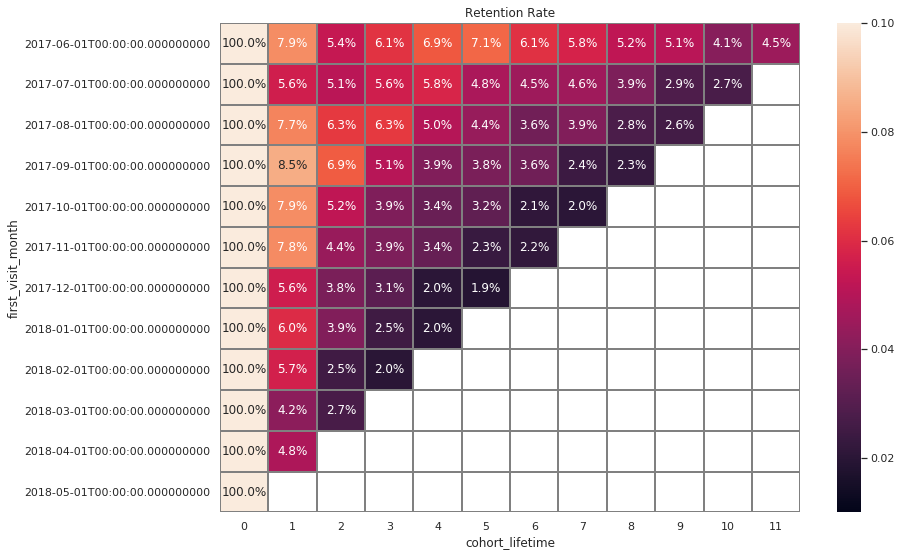

In [33]:
#строим сводную таблицу и тепловую карту для Retention Rate
retention_pivot = visits_cohorts.pivot_table(
    index='first_visit_month', columns='cohort_lifetime', values='retention', aggfunc='sum'
)

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Retention Rate')
sns.heatmap(retention_pivot, vmin=0.01, vmax=0.1, annot=True, fmt='.1%', linewidths=1, linecolor='gray')

In [34]:
#сбрасываем индексы у сводной таблицы
reset_retention_pivot = retention_pivot.reset_index()

#считаем средний Retention Rate за второй месяц жизни когорт
mean_rr_second_month = reset_retention_pivot[1].mean()
print('Средний RR на второй месяц жизни когорт: {:.2%}'.format(mean_rr_second_month))

Средний RR на второй месяц жизни когорт: 6.52%


**Выводы**
1. Как видно из тепловой карты Retention Rate максимальный показатель составил всего 8.5% у четвертой когорты (01-09-2017) за второй месяц. Учитывая, что не имеем аналогов для сравнения пока не можем сказать, хорошие это показатели или плохие. Но при этом отчетливо прослеживается тенденция к снижению RR с течением времени.
2. Средний показатель Retention Rate на второй месяц жизни когорт составил всего 6.52%.
3. Возможно снижение показателей RR может быть обусловлено: а) неудобством интерфейса, б) отсутствием нужной пользователям информации или невозможностью ее быстро найти, в) сайты конкурентов в выдаче показываются на более высоких позициях, г) ошибки в работе сервиса. По этим причинам пользователи могут не возвращаться или уходить на сайты конкурентов.  

# Выводы к пункту 3.1 шага 3

1. Из расчетов получили такие результаты: количество уникальных пользователей в день - 907, в неделю - WAU 5716, в месяц - MAU 23228.
2. Пик количества пользователей по дням приходится на 15-21 день ноября. При этом замечаем, что пользовательская активность практически падает до нуля в конце марта 18 года и резко возрастает (примерно до 900 пользователей) в начале апреля этого же года. При распределении по неделям и месяцам больше всего пользователей приходится на ноябрь 17 года. Плюс, наблюдается резкий рост пользователей начиная с августа 17 года вплоть до декабря. После новогодних каникул наблюдается постепенное снижение количества пользователей. При этом, в теплое время года: с апреля по начало сентября пользователей становится меньше всего. Такая "сезонность" может быть обусловлена поездками на дачу, проведением времени на улице, отпусками.
3. Среднее количество сессий за весь период составило 1,28. Т.е. немногим больше чем одна сессия на одного пользователя, а значит пользователи используют сайт нерегулярно. 
4. Построив график распределения, убедились, что нужно использовать моду - 60 сек., т.к. график распределения не являлся нормальным или близким к нормальному. Такое короткое время в 60 сек. может быть достаточным для того, чтобы проверить расписание сеансов, например. Но если пользователь еще не решил чем себя занять, куда сходить и т.д., то этого времени явно будет мало.
5. Максимальный показатель RR составил всего 8.5% у четвертой когорты (01-09-2017) за второй месяц. Учитывая, что не имеем аналогов для сравнения пока не можем сказать, хорошие это показатели или плохие. Но при этом отчетливо прослеживается тенденция к снижению RR с течением времени. Средний показатель Retention Rate на второй месяц жизни когорт составил всего 6.52%. Лучше всего RR у самой первой когорты. Следует обратить внимание на это, может были какие-то особенности на сайте (акции, подарки и т.д.) в месяц формирования первой когороты, поэтому у нее RR лучше.
6. Возможно снижение показателей RR может быть обусловлено: а) неудобством интерфейса, б) отсутствием нужной пользователям информации или невозможностью ее быстро найти, в) сайты конкурентов в выдаче показываются на более высоких позициях, г) ошибки в работе сервиса. По этим причинам пользователи могут не возвращаться или уходить на сайты конкурентов. 


<a id="ecommercemetrics"></a>
### Метрики электронной коммерции

#### Среднее время первой покупки

In [35]:
#добавляем столбцы с датами и месяцами заказов
orders['order_date'] = orders['buy_ts'].dt.date
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

#вычисляем первый заказ
first_order = orders.groupby('uid')['buy_ts'].min().reset_index()
first_order.columns = ['uid', 'first_order_ts']

#добавляем столбцы с днем и месяцем первого заказа
first_order['first_order_dt'] = first_order['first_order_ts'].dt.date
first_order['first_order_month'] = first_order['first_order_ts'].astype('datetime64[M]')

#проверяем
first_order.head(1)

,uid,first_order_ts,first_order_dt,first_order_month
0,313578113262317,2018-01-03 21:51:00,2018-01-03,2018-01-01


In [36]:
#объединяем первые визиты и первые заказы
buyers = pd.merge(first_visit_date, first_order, on='uid')

#проверяем
buyers.head(1)

,uid,first_visit_start,first_visit_dt,first_visit_month,first_order_ts,first_order_dt,first_order_month
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01-01


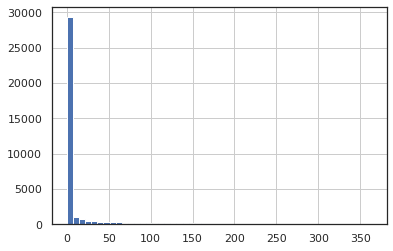

In [37]:
((buyers['first_order_ts'] - buyers['first_visit_start'])/np.timedelta64(1,'D')).hist(bins=50)


In [38]:
#посмотрим сколько времени нужно для первой покупки
round(((buyers['first_order_ts'] - buyers['first_visit_start'])/np.timedelta64(1,'D')).mean())


17

**Вывод**

Среднее время покупки 17 дней.

#### Cреднее количество покупок на одного покупателя за 6 месяцев

In [39]:
#делаем срез за первые 6 месяцев
six_month_orders = orders[orders['order_month'] < '2017-12-01']

#сгруппируем по дате
grouped_six_month_orders = six_month_orders.groupby('uid').agg({'uid': ['count', 'nunique']})

#меняем названия столбцов
grouped_six_month_orders.columns = ['n_orders', 'n_buyers']

#считаем количество заказов на одного пользователя
grouped_six_month_orders['orders_per_user'] = grouped_six_month_orders['n_orders'] / grouped_six_month_orders['n_buyers']

#узнаем среднее количество заказов на одного пользователя
print(grouped_six_month_orders['orders_per_user'].mean())

1.3021816399068513


**Вывод**

На одного пользователя приходится в среднем немногим больше, чем 1 покупка.

#### Cредний чек


In [40]:
#делаем группировку по мес. покупок и считаем количество уникальных покупателей и сумму, которую они принесли
orders_average = orders.groupby('order_month').agg({'uid': 'nunique', 'revenue': 'sum'}).reset_index()

#меняем названия столбцов
orders_average.columns = ['order_month', 'n_of_buyers', 'revenue']

#проверяем
orders_average.head(1)                                                           

,order_month,n_of_buyers,revenue
0,2017-06-01,2023,9557.49


In [41]:
#добавляем столбец с расчетом дохода на 1 покупателя
orders_average['rev_per_user'] = orders_average['revenue'] / orders_average['n_of_buyers']

#проверяем
orders_average.head(1)  

,order_month,n_of_buyers,revenue,rev_per_user
0,2017-06-01,2023,9557.49,4.724414


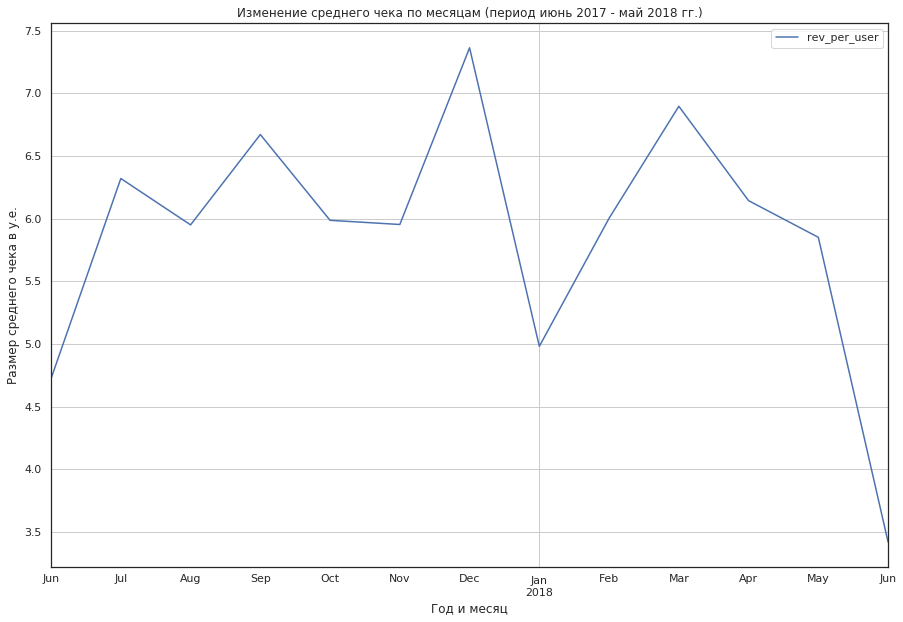

In [42]:
#строим график изменения среднего чека по месяцам за весь период
orders_average.groupby('order_month').agg({'rev_per_user': 'mean'}).plot(figsize=(15, 10), grid=True)
plt.title('Изменение среднего чека по месяцам (период июнь 2017 - май 2018 гг.)')
plt.ylabel('Размер среднего чека в у.е.')
plt.xlabel('Год и месяц')
plt.show()

In [43]:
print('Размер среднего чека за весь период: {:.1f} у.е.'.format(orders_average['rev_per_user'].mean()))

Размер среднего чека за весь период: 5.9 у.е.


**Выводы**
1. Между средним чеком и количеством посещений есть некоторые сходства. Например, самый высокий чек приходится на конец ноября и начало декабря (около 7.5 у.е.), но к началу января наблюдается спад. У посещений такая же картина. Затем к началу весны  средний чек начинает расти. Но с апреля, как и у посещений, наблюдается падение среднего чека. Т.е. сезонность в отношении среднего чека также прослеживается.
2. Размер среднего чека за весь период составил 5.9 у.е. 

#### Изменение LTV  во времени

In [44]:
#считаем количество покупателей
coh_orders_size = buyers.groupby('first_order_month')['uid'].agg('nunique').reset_index()
coh_orders_size.columns = ['first_order_month', 'n_buyers']

#проверяем
coh_orders_size.head(1)

,first_order_month,n_buyers
0,2017-06-01,2023


In [45]:
#делаем когорту по заказам путем объединения данных из двух таблиц
cohorts_orders = pd.merge(orders, buyers, how='inner', on='uid').groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index()

#проверяем
cohorts_orders.head(1)

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49


In [46]:
#считаем lifetime когорты
cohorts_orders['cohort_lifetime'] = ((cohorts_orders['order_month'] - cohorts_orders['first_order_month'])/np.timedelta64(1, 'M')).round()

#проверяем
cohorts_orders.head(1)

,first_order_month,order_month,revenue,cohort_lifetime
0,2017-06-01,2017-06-01,9557.49,0.0


In [47]:
#объединяем таблицы с количеством покупателей и когортами
cohorts_order_report = pd.merge(cohorts_orders, coh_orders_size, on='first_order_month')

#добавляем столбец с расчетом дохода на 1 пользователя
cohorts_order_report['rev_per_user'] = cohorts_order_report['revenue'] / cohorts_order_report['n_buyers']

#проверяем
cohorts_order_report.head(1)

,first_order_month,order_month,revenue,cohort_lifetime,n_buyers,rev_per_user
0,2017-06-01,2017-06-01,9557.49,0.0,2023,4.724414


In [48]:
#задаем степень маржинальности
margin_rate = 1

#считаем валовую прибыль
cohorts_order_report['gp'] = cohorts_order_report['revenue'] * margin_rate

#считаем прибыль на 1 покупателя
cohorts_order_report['gp_per_user'] = cohorts_order_report['gp'] / cohorts_order_report['n_buyers']

#проверяем
cohorts_order_report.head(1)

,first_order_month,order_month,revenue,cohort_lifetime,n_buyers,rev_per_user,gp,gp_per_user
0,2017-06-01,2017-06-01,9557.49,0.0,2023,4.724414,9557.49,4.724414


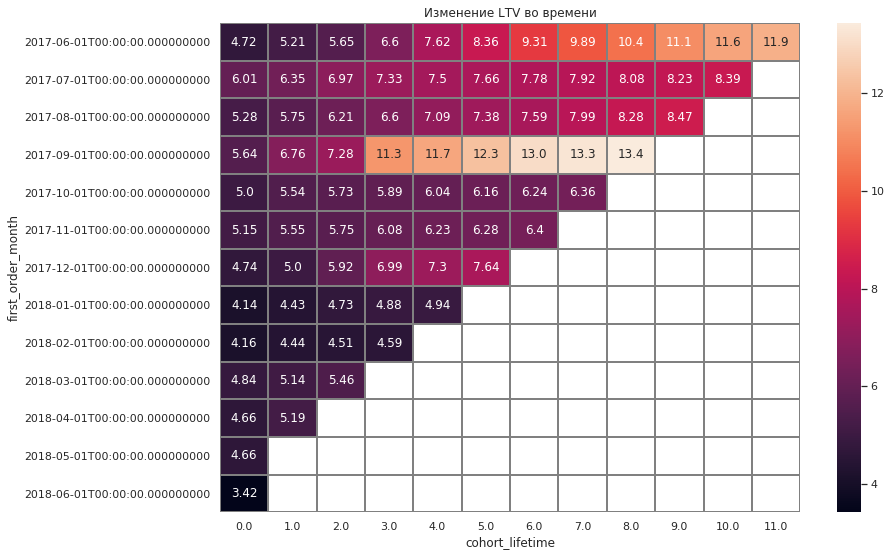

In [49]:
#строим график изменения ltv во времени за весь период для всех когорт
output_cohorts_order_report = cohorts_order_report.pivot_table(index='first_order_month', columns='cohort_lifetime', values='gp_per_user', aggfunc='mean').cumsum(axis=1)
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Изменение LTV во времени')
sns.heatmap(output_cohorts_order_report, annot=True, fmt='.3', linewidths=1, linecolor='gray')

In [50]:
#считаем средний ltv за 6 мес.
round(output_cohorts_order_report[5].mean(), 2)

7.97

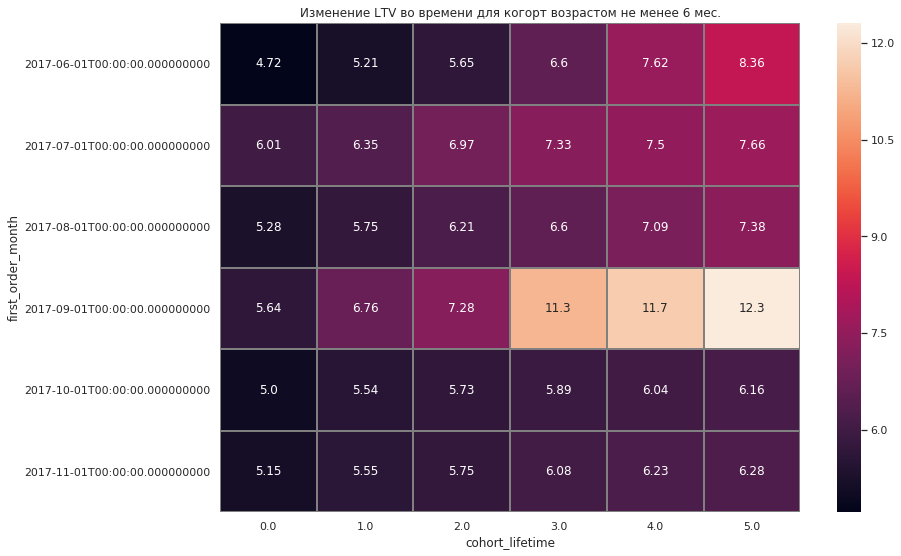

In [51]:
#делаем срез только для тех когорт, которые прожили не менее 6 мес.
six_month_cohorts = output_cohorts_order_report.iloc[:6,:6].copy()

#строим график для когорт, которые прожили не менее 6 мес.
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Изменение LTV во времени для когорт возрастом не менее 6 мес.')
sns.heatmap(six_month_cohorts, annot=True, fmt='.3', linewidths=1, linecolor='gray')

**Выводы**
1. Самый высокий LTV для когорт, проживших не менее 6 мес. - у 4 когорты (01-09-2017). Если смотреть на весь период, то лучшую динамику показывают: 4, 1, 2 и 3 когорты соответственно, т.е. самые первые 4 когорты. У последующих когорт динамика и размер LTV меньше, чем у вышеуказанных когорт.
2. При этом общая тенденция такова, что LTV для всех когорт от месяца к месяцу растет.

# Выводы к пункту 3.2 шага 3
1. Среднее время покупки составило 17 дней, а на одного пользователя приходится в среднем чуть больше 1 покупки (1.3).
2. Между средним чеком и количеством посещений есть некоторые сходства. Например, самый высокий чек приходится на конец ноября и начало декабря (около 7.5 у.е.), но к началу января наблюдается спад. У посещений такая же картина. Затем к началу весны  средний чек начинает расти. Но с апреля, как и у посещений, наблюдается падение среднего чека. Т.е. сезонность в отношении среднего чека также прослеживается.
3. Размер среднего чека за весь период составил 5.9 у.е. 
4. В отношении LTV заметили, что самый высокий LTV для когорт, проживших не менее 6 мес. - у 4 когорты (01-09-2017). Если смотреть на весь период, то лучшую динамику показывают: 4, 1, 2 и 3 когорты соответственно, т.е. самые первые 4 когорты. У последующих когорт динамика и размер LTV меньше, чем у вышеуказанных когорт. При этом общая тенденция такова, что LTV для всех когорт от месяца к месяцу растет.

<a id="marketingmetrics"></a>
### Маркетинговые метрики

#### Расходы на маркетинг

In [52]:
#находим первый источник визита на сайт для каждого пользователя
visitors = visits.sort_values(by='start_ts').groupby('uid').first()

visitors = visitors[['source_id']]

#проверяем
visitors.head(1)

,source_id
uid,
11863502262781,3


In [53]:
#получаем объединенный датасет из таблиц с покупателями и первыми источниками
buyers_upd = pd.merge(buyers, visitors, left_on='uid', right_index=True)

#проверяем
buyers_upd.head(1)

,uid,first_visit_start,first_visit_dt,first_visit_month,first_order_ts,first_order_dt,first_order_month,source_id
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01-01,2


In [54]:
#считаем количество покупателей за день по первому источнику
buyers_per_day = buyers_upd.groupby(['source_id', 'first_order_dt']).agg({'uid': 'count'}).reset_index()

#меняем названия столбца
buyers_per_day.rename(columns={'uid': 'n_buyers'}, inplace=True)

#меняем тип данных
buyers_per_day['first_order_dt'] = pd.to_datetime(buyers_per_day['first_order_dt'])

#проверяем
buyers_per_day.head(1)

,source_id,first_order_dt,n_buyers
0,1,2017-06-01,14


In [55]:
#создадим столбец с месяцем расходов
costs['costs_month'] = costs['date'].astype('datetime64[M]')

#проверяем
costs.head(1)

,source_id,date,costs,costs_month
0,1,2017-06-01,75.2,2017-06-01


In [56]:
#объединяем таблицы
costs_upd = pd.merge(buyers_per_day, costs, left_on=['source_id', 'first_order_dt'], right_on=['source_id', 'date'])

#проверяем
costs_upd.head(1)

,source_id,first_order_dt,n_buyers,date,costs,costs_month
0,1,2017-06-01,14,2017-06-01,75.2,2017-06-01


In [57]:
#узнаем расход на 1 покупателя
costs_upd['costs_per_buyer'] = costs_upd['costs'] / costs_upd['n_buyers']

#проверяем
costs_upd.head(1)

,source_id,first_order_dt,n_buyers,date,costs,costs_month,costs_per_buyer
0,1,2017-06-01,14,2017-06-01,75.2,2017-06-01,5.371429


In [58]:
#общая сумма расходов на маркетинг
print('Потрачено на маркетинг всего:', costs_upd['costs'].sum())

Потрачено на маркетинг всего: 327825.82


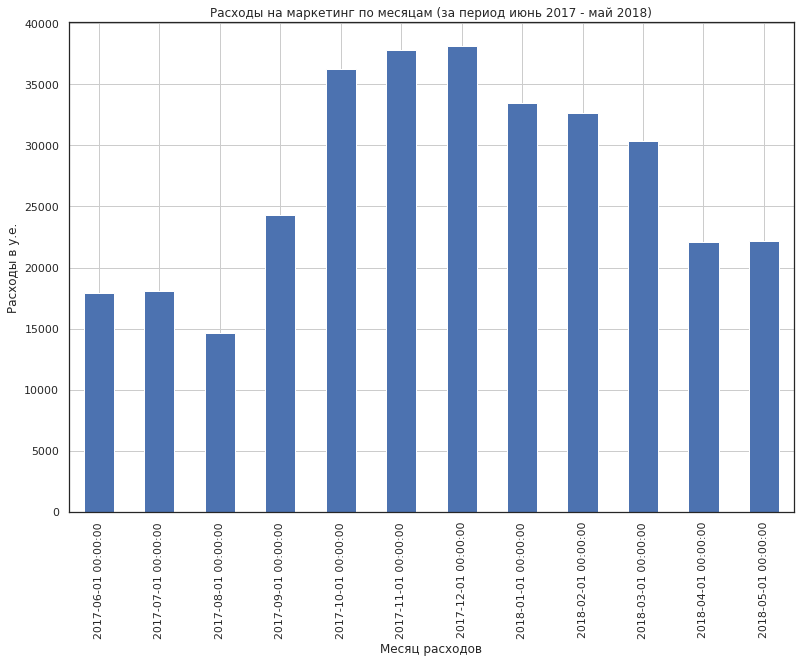

In [59]:
#строим график по расходам в месяц за весь период
costs_upd.groupby('costs_month')['costs'].sum().plot(kind='bar', grid=True, figsize=(13, 9))
plt.title('Расходы на маркетинг по месяцам (за период июнь 2017 - май 2018)')
plt.ylabel('Расходы в у.е.')
plt.xlabel('Месяц расходов')
plt.show()

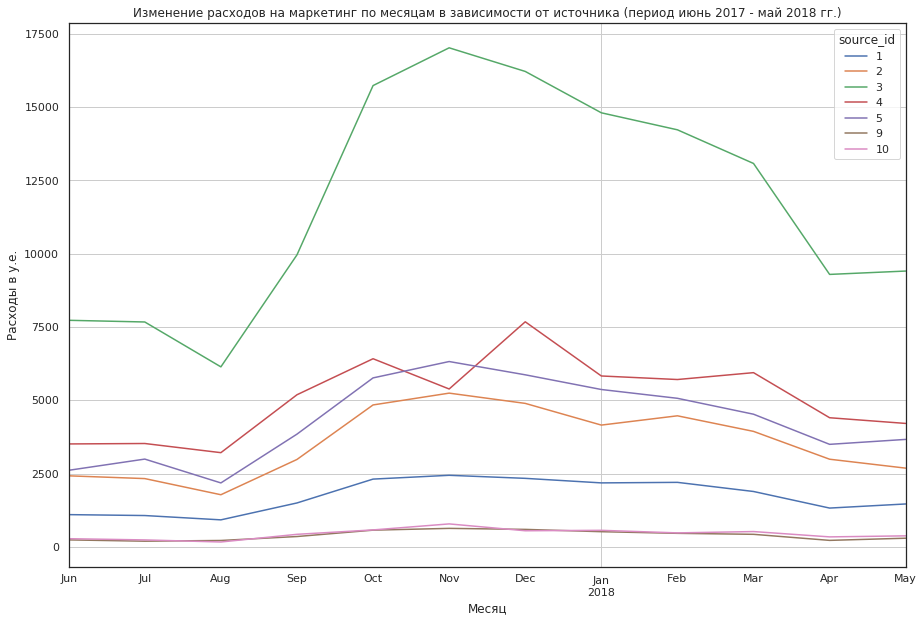

In [60]:
#строим график изменения расходов на маркетинг в зависимости от источника по месяцам
costs_upd.pivot_table(index='costs_month', columns='source_id', values='costs', aggfunc='sum').plot(figsize=(15, 10), grid=True)
plt.title('Изменение расходов на маркетинг по месяцам в зависимости от источника (период июнь 2017 - май 2018 гг.)')
plt.ylabel('Расходы в у.е.')
plt.xlabel('Месяц')
plt.show()

In [61]:
costs_upd.pivot_table(index = 'source_id', values = 'costs', aggfunc = 'sum').sort_values(by='costs', ascending=False)

,costs
source_id,
3,141321.63
4,61057.91
5,51756.40
2,42777.37
1,20785.41
10,5351.94
9,4775.16


**Выводы**
1. Всего на маркетинг было потрачено 327 825.82 у.е.
2. Самые дорогие источники в порядке убывания по сумме затрат: 3, 4, 5, 2, 1, 10, 9. Причем источник под номером 3 значительно превышает все остальные источники, на него тратится больше всего средств. Больше чем 4 и 5 вместе взятые, которые находятся на 2 и 3 месте соответственно.
3. Декабрь, ноябрь и октябрь самые дорогие месяцы с точки зрения затрат на маркетинг.

#### Расчет и визуализация по САС

In [62]:
#найдем CAC на 1 пользователя для каждого источника 
round(costs_upd.groupby('source_id')['costs_per_buyer'].mean(), 1)

source_id
1      9.5
2     16.3
3     15.6
4      7.3
5      8.3
9      6.8
10     6.6
Name: costs_per_buyer, dtype: float64

In [63]:
#найдем CAC на 1 пользователя для всего проекта 
round(costs_upd['costs_per_buyer'].mean(), 1)

10.2

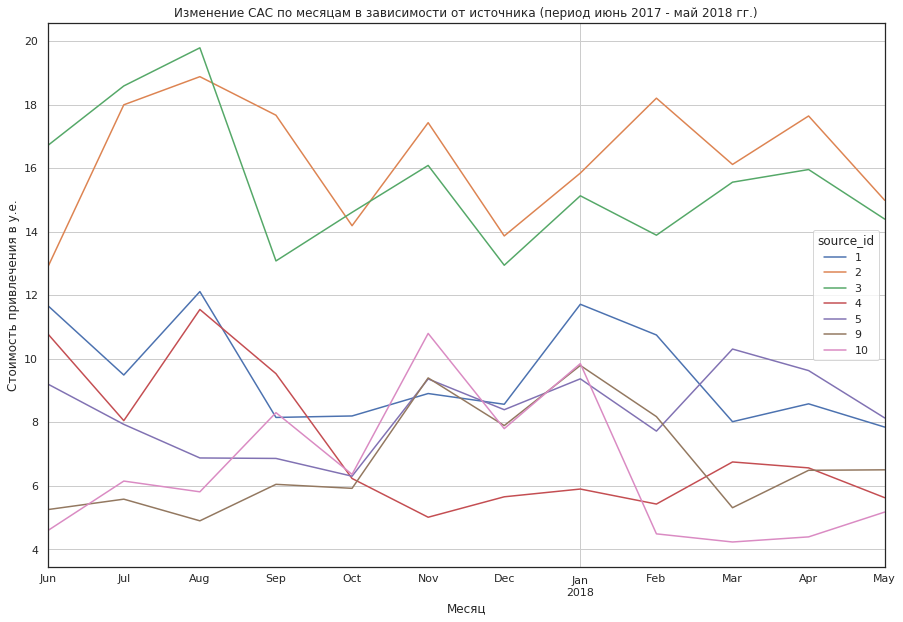

In [64]:
#строим график изменения CAC в зависимости от источника по месяцам
costs_upd.pivot_table(index='costs_month', columns='source_id', values='costs_per_buyer', aggfunc='mean').plot(figsize=(15, 10), grid=True)
plt.title('Изменение CAC по месяцам в зависимости от источника (период июнь 2017 - май 2018 гг.)')
plt.ylabel('Стоимость привлечения в у.е.')
plt.xlabel('Месяц')
plt.show()


**Выводы**
1. Увидели, что стоимость привлечения 1 клиента дороже всего для источников 2 и 3. 16.3 и 15.6 у.е. соответственно, при этом средний САС составил 10.2 у.е., что значительно меньше сумм для источников 2 и 3.
2. При этом дороже всего привлечение по этим двум источникам обходилось на не самые активные месяцы: июль-август 17 года.

#### ROMI по когортам в разрезе источников


In [65]:
#считаем количество покупателей с учетом первого источника
romi_cohort_sizes = buyers_upd.groupby(['source_id', 'first_order_month']).agg({'uid': 'nunique'}).reset_index()

#меняем названия столбцов
romi_cohort_sizes.columns = ['source_id', 'first_order_month', 'n_buyers']

#проверяем
romi_cohort_sizes.head(1)

,source_id,first_order_month,n_buyers
0,1,2017-06-01,190


In [66]:
#добавим столбец с доходами к таблице с покупателями
romi_cohorts = pd.merge(buyers_upd, orders[['uid', 'revenue', 'order_month']], on='uid').groupby(['source_id', 'first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index()

#проверяем
romi_cohorts.head(1)

,source_id,first_order_month,order_month,revenue
0,1,2017-06-01,2017-06-01,1378.7


In [67]:
#объединяем таблицы с количеством покупателей и когортами
romi_cohorts_report = pd.merge(romi_cohorts, romi_cohort_sizes, on=['source_id', 'first_order_month'])

#считаем валовую прибыль
romi_cohorts_report['gp'] = romi_cohorts_report['revenue'] * margin_rate

#считаем прибыль на 1 покупателя
romi_cohorts_report['gp_per_user'] = romi_cohorts_report['gp'] / romi_cohorts_report['n_buyers']

#создаем столбец со сроком жизни когорт
romi_cohorts_report['age'] = (romi_cohorts_report['order_month'] - romi_cohorts_report['first_order_month']) / np.timedelta64(1, 'M')
romi_cohorts_report['age'] = romi_cohorts_report['age'].round().astype('int')

#проверяем
romi_cohorts_report.head(1)

,source_id,first_order_month,order_month,revenue,n_buyers,gp,gp_per_user,age
0,1,2017-06-01,2017-06-01,1378.7,190,1378.7,7.256316,0


In [68]:
# считаем расходы за месяц
monthly_costs = costs.groupby(['costs_month', 'source_id']).agg({'costs': 'sum'}).reset_index()
monthly_costs.head(1) 

,costs_month,source_id,costs
0,2017-06-01,1,1125.61


In [69]:
#объединяем когорты (romi_cohorts_report) с расходами
romi_cohorts_report_upd = pd.merge(romi_cohorts_report, monthly_costs, left_on=['first_order_month', 'source_id'], right_on=['costs_month', 'source_id'])

#проверяем
romi_cohorts_report_upd.head(1)

,source_id,first_order_month,order_month,revenue,n_buyers,gp,gp_per_user,age,costs_month,costs
0,1,2017-06-01,2017-06-01,1378.7,190,1378.7,7.256316,0,2017-06-01,1125.61


In [70]:
#узнаем сас
romi_cohorts_report_upd['cac'] = romi_cohorts_report_upd['costs'] / romi_cohorts_report_upd['n_buyers']

#узнаем romi
romi_cohorts_report_upd['romi'] = romi_cohorts_report_upd['gp_per_user'] / romi_cohorts_report_upd['cac']

#проверяем
romi_cohorts_report_upd.head(1)

,source_id,first_order_month,order_month,revenue,n_buyers,gp,gp_per_user,age,costs_month,costs,cac,romi
0,1,2017-06-01,2017-06-01,1378.7,190,1378.7,7.256316,0,2017-06-01,1125.61,5.924263,1.224847


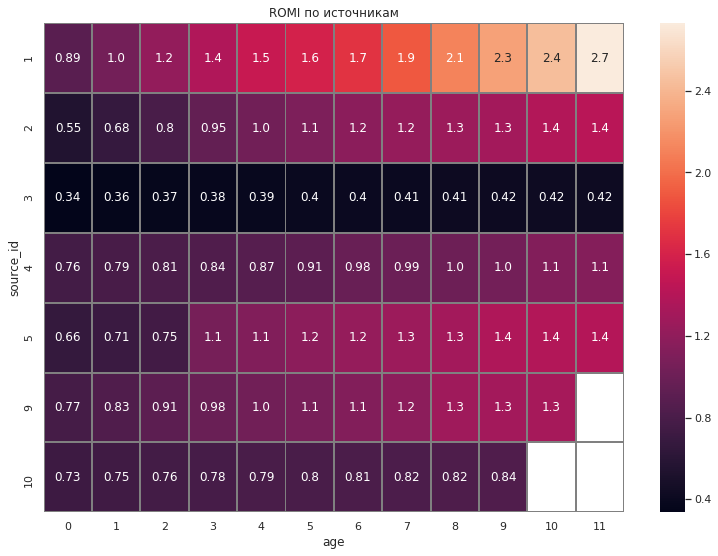

In [71]:
#методом cumsum считаем накоппительный romi
output_romi = romi_cohorts_report_upd.pivot_table(index='source_id', columns='age', values='romi', aggfunc='mean').cumsum(axis=1)

#строим график
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('ROMI по источникам')
sns.heatmap(output_romi, annot=True, fmt='.2', linewidths=1, linecolor='gray')


**Выводы**  

Раньше всего окупается 1 источник, затем 5, 2 и 9. Лучшую динамику демонстрируют: 1 и 5 источники. 10 и 3 источник не окупаются совсем, а 4 источник приносит прибыль только на 11 и 12 месяц жизни.

# Выводы к пункту 3.3 шага 3

1. Всего на маркетинг было потрачено 327 825.82 у.е.
2. Самые дорогие источники в порядке убывания по сумме затрат: 3, 4, 5, 2, 1, 10, 9. Причем источник под номером 3 значительно превышает все остальные источники, на него тратится больше всего средств. Больше чем 4 и 5 вместе взятые, которые находятся на 2 и 3 месте соответственно.
3. Декабрь, ноябрь и октябрь самые дорогие месяцы с точки зрения затрат на маркетинг.
4. Увидели, что стоимость привлечения 1 клиента дороже всего для источников 2 и 3. 16.3 и 15.6 у.е. соответственно, при этом средний САС составил 10.2 у.е., что значительно меньше сумм для источников 2 и 3. При этом дороже всего привлечение по этим двум источникам обходилось на не самые активные месяцы: июль-август 17 года.
5. Раньше всего окупается 1 источник, затем 5, 2 и 9. Лучшую динамику демонстрируют: 1 и 5 источники.10 и 3 источник не окупаются совсем, а 4 источник приносит прибыль только на 11 и 12 месяц жизни.

<a id="summary"></a>
## Общие выводы и рекомендации

1. Согласно графику изменения количества уникальных пользователей в месяц необходимы мероприятия по привлечению пользователей в период с конца марта по начало сентября, т.к. в этот период на сайт приходит меньше всего пользователей. 
2. Среднее количество сессий за весь период с мая 17 по июнь 18 гг. составило 1,28. Т.е. немногим больше чем одна сессия на одного пользователя, а значит пользователи используют сайт нерегулярно. Таким образом, данный показатель можно попробовать улучшить. Кроме того, следует обратить на продолжительность сессии, которая составила - 60 сек (в работе использовали моду, т.к. график распределения не являлся нормальным или близким к нормальному). Такое короткое время в 60 сек. может быть достаточным для того, чтобы проверить расписание сеансов, например. Но если пользователь еще не решил чем себя занять, куда сходить и т.д., то этого времени явно будет мало.
3. Максимальный показатель RR составил всего 8.5% у четвертой когорты (01-09-2017) за второй месяц. Учитывая, что не имеем аналогов для сравнения пока не можем сказать, хорошие это показатели или плохие. Но при этом отчетливо прослеживается тенденция к снижению RR с течением времени. Средний показатель Retention Rate на второй месяц жизни когорт составил всего 6.52%. Лучше всего RR у самой первой когорты. Следует обратить внимание на это, может были какие-то особенности на сайте (акции, подарки и т.д.) в месяц формирования первой когороты, поэтому у нее RR лучше. Таким образом, также необходимо провести работу над улучшением показателя RR. Возможно снижение показателей RR может быть обусловлено: а) неудобством интерфейса, б) отсутствием нужной пользователям информации или невозможностью ее быстро найти, в) сайты конкурентов в выдаче показываются на более высоких позициях, г) ошибки в работе сервиса. По этим причинам пользователи могут не возвращаться или уходить на сайты конкурентов. 
4. В отношении LTV заметили, что самый высокий LTV для когорт, проживших не менее 6 мес. - у 4 когорты (01-09-2017). Если смотреть на весь период, то лучшую динамику показывают: 4, 1, 2 и 3 когорты соответственно, т.е. самые первые четыре когорты. У последующих когорт динамика и размер LTV меньше, чем у вышеуказанных когорт. При этом общая тенденция такова, что LTV для всех когорт от месяца к месяцу растет. Но при этом, увеличив количество покупок на одного пользователя, которое составляет в среднем чуть больше 1 покупки (1.3), можно улучшить и LTV.
5. Между средним чеком и количеством посещений есть некоторые сходства. Например, самый высокий чек приходится на конец ноября и начало декабря (около 7.5 у.е.), но к началу января наблюдается спад. У посещений такая же картина. Затем к началу весны  средний чек начинает расти. Но с апреля, как и у посещений, наблюдается падение среднего чека. Т.е. сезонность в отношении среднего чека также прослеживается. Размер среднего чека за весь период составил 5.9 у.е. 
6. Самые дорогие источники в порядке убывания по сумме затрат: 3, 4, 5, 2, 1, 10, 9. Причем источник под номером 3 значительно превышает все остальные источники, на него тратится больше всего средств. Больше чем 4 и 5 вместе взятые, которые находятся на 2 и 3 месте соответственно. Декабрь, ноябрь и октябрь самые дорогие месяцы с точки зрения затрат на маркетинг.
7. Увидели, что стоимость привлечения 1 клиента дороже всего для источников 2 и 3. 16.3 и 15.6 у.е. соответственно, при этом средний САС составил 10.2 у.е., что значительно меньше сумм для источников 2 и 3. При этом дороже всего привлечение по этим двум источникам обходилось на не самые активные месяцы: июль-август 17 года.
8. Раньше всего окупается 1 источник, затем 5, 2 и 9. Лучшую динамику демонстрируют: 1 и 5 источники. 10 и 3 источник не окупаются совсем, а 4 источник приносит прибыль только на 11 и 12 месяц жизни.
9. Учитывая изложенное, лучше:  

 - отказаться от источников 10, 3 и 4, т.к. 10 и 3 источник не окупаются совсем, 4 источник начинает приносить прибыль только на 11 и 12 мес. При этом, источник 3 является одним из самых дорогих с т.з. привлечения клиентов (затраты составили 15.6 у.е. на 1 клиента, что на 50% больше среднего размера затрат на 1 клиента);
 - в отношении источника 2 попробовать оптимизировать затраты и рекламу, т.к. он является самым дорогим с т.з. привлечения и самые большие затраты на него приходятся на непиковое время (июль-август);
 - с т.з. временных когорт, лучшими являются когорты с 1 по 4.